In [123]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import  numpy as np
import warnings
warnings.filterwarnings('ignore')

In [124]:
airports = pd.read_csv("dataset/airports_data.csv")
bags = pd.read_csv("dataset/bags_level_data.csv")
flights = pd.read_csv("dataset/flight_level_data.csv")
pnr = pd.read_csv("dataset/pnr_flight_level_data.csv")
remarks = pd.read_csv("dataset/pnr_remark_level_data.csv")

# Feature Engineering on airports

In [125]:
airports.head()

,airport_iata_code,iso_country_code
0,DAU,PG
1,MDU,PG
2,MXH,PG
3,MIS,PG
4,TIZ,PG


In [126]:
airports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5612 entries, 0 to 5611
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   airport_iata_code  5612 non-null   object
 1   iso_country_code   5597 non-null   object
dtypes: object(2)
memory usage: 87.8+ KB


In [127]:
airports.isnull().sum()    #we have null values so we have to handle them

airport_iata_code     0
iso_country_code     15
dtype: int64

In [128]:
airports.duplicated().sum()

np.int64(0)

In [129]:
airports[airports['iso_country_code'].isnull()]

,airport_iata_code,iso_country_code
321,OND,NaN
322,ERS,NaN
323,WDH,NaN
2628,ADI,NaN
2629,GOG,NaN
2630,GFY,NaN
2631,MPA,NaN
2632,KMP,NaN
2633,LUD,NaN
2634,OKU,NaN


*Only 15 null values so we can fill them manually*

In [130]:
missing_dict = {
    'OND':'AO','ERS':'ER','WDH':'NA','ADI':'IN','GOG':'IN','GFY':'GL','MPA':'BW',
    'KMP':'PG','LUD':'NA','OKU':'CM','OMD':'OM','NDU':'VU','RHN':'NA','SWP':'SR','WVB':'NA'
}
airports['iso_country_code'] = airports.apply(
    lambda row: missing_dict[row['airport_iata_code']] if pd.isna(row['iso_country_code']) else row['iso_country_code'],
    axis=1
)

In [131]:
airports.isnull().sum()

airport_iata_code    0
iso_country_code     0
dtype: int64

In [132]:
airports.describe(include='all') #Here count is equal to unique means there is no duplicate iata code in dataset

,airport_iata_code,iso_country_code
count,5612,5612
unique,5612,233
top,DAU,US
freq,1,1477


*Top 10 Countries by Number of Airports*

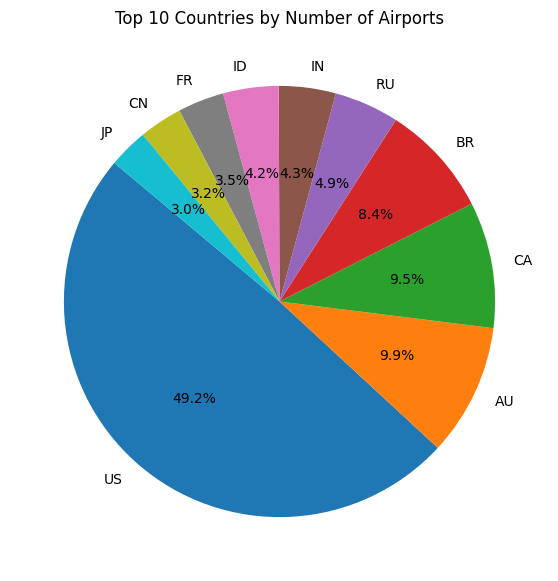

In [133]:
top_countries = airports['iso_country_code'].value_counts().head(10)
plt.figure(figsize=(7,7))
plt.pie(top_countries, labels=top_countries.index, autopct='%1.1f%%', startangle=140)
plt.title("Top 10 Countries by Number of Airports")
plt.show()

#USA has the highest number of airports

# Feature Engineering on bags

In [134]:
bags.head()

,company_id,flight_number,scheduled_departure_date_local,scheduled_departure_station_code,scheduled_arrival_station_code,bag_tag_unique_number,bag_tag_issue_date,bag_type
0,UA,1068,2025-08-01,ORD,IAD,BAGTAG_418666,2025-07-27,Transfer
1,UA,622,2025-08-01,ORD,DEN,BAGTAG_418667,2025-07-28,Transfer
2,YX,3718,2025-08-01,ORD,MSN,BAGTAG_84760,2025-07-28,Transfer
3,BA,294,2025-08-01,ORD,LHR,BAGTAG_418669,2025-07-28,Transfer
4,UA,2627,2025-08-01,ORD,MSP,BAGTAG_335257,2025-07-28,Transfer


In [135]:
bags_ua = bags[bags['company_id'] == 'UA'].copy() #filtering united airlines data

In [136]:
bags_ua.duplicated().sum() 

np.int64(17)

In [137]:
bags_ua = bags_ua.drop_duplicates()

In [138]:
bags_ua.duplicated().sum() 

np.int64(0)

In [139]:
bags_ua.info()

<class 'pandas.core.frame.DataFrame'>
Index: 499282 entries, 0 to 687233
Data columns (total 8 columns):
 #   Column                            Non-Null Count   Dtype 
---  ------                            --------------   ----- 
 0   company_id                        499282 non-null  object
 1   flight_number                     499282 non-null  int64 
 2   scheduled_departure_date_local    499282 non-null  object
 3   scheduled_departure_station_code  499282 non-null  object
 4   scheduled_arrival_station_code    499282 non-null  object
 5   bag_tag_unique_number             499282 non-null  object
 6   bag_tag_issue_date                499282 non-null  object
 7   bag_type                          499282 non-null  object
dtypes: int64(1), object(7)
memory usage: 34.3+ MB


In [140]:
bags_ua['scheduled_departure_date_local'] = pd.to_datetime(bags_ua['scheduled_departure_date_local']) 
bags_ua['bag_tag_issue_date'] = pd.to_datetime(bags_ua['bag_tag_issue_date'])

In [141]:
bags_ua.isnull().sum()

company_id                          0
flight_number                       0
scheduled_departure_date_local      0
scheduled_departure_station_code    0
scheduled_arrival_station_code      0
bag_tag_unique_number               0
bag_tag_issue_date                  0
bag_type                            0
dtype: int64

In [142]:
bags_ua.describe()

,flight_number,scheduled_departure_date_local,bag_tag_issue_date
count,499282.000000,499282,499282
mean,1487.047088,2025-08-07 20:26:31.815447808,2025-08-07 19:17:32.668432128
min,3.000000,2025-08-01 00:00:00,2025-07-27 00:00:00
25%,907.000000,2025-08-04 00:00:00,2025-08-04 00:00:00
50%,1538.000000,2025-08-08 00:00:00,2025-08-08 00:00:00
75%,2137.000000,2025-08-12 00:00:00,2025-08-12 00:00:00
max,3748.000000,2025-08-15 00:00:00,2025-08-16 00:00:00
std,729.931495,NaN,NaN


In [143]:
bags_ua['bag_type'].value_counts()

bag_type
Origin          242201
Transfer        224635
Hot Transfer     32446
Name: count, dtype: int64

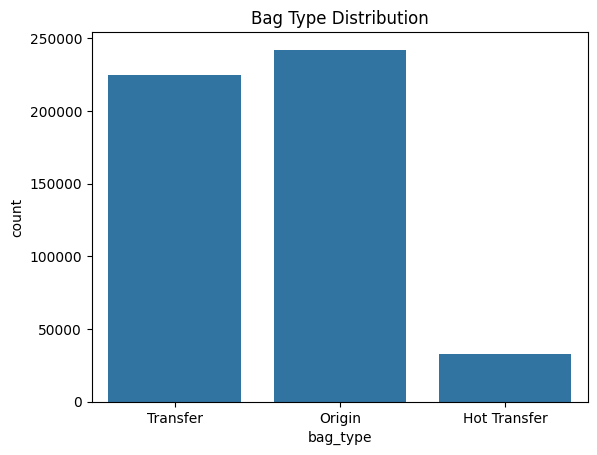

In [144]:
sns.countplot(data=bags_ua, x='bag_type')
plt.title("Bag Type Distribution")
plt.show()

In [145]:
bags_ua.head()

,company_id,flight_number,scheduled_departure_date_local,scheduled_departure_station_code,scheduled_arrival_station_code,bag_tag_unique_number,bag_tag_issue_date,bag_type
0,UA,1068,2025-08-01,ORD,IAD,BAGTAG_418666,2025-07-27,Transfer
1,UA,622,2025-08-01,ORD,DEN,BAGTAG_418667,2025-07-28,Transfer
4,UA,2627,2025-08-01,ORD,MSP,BAGTAG_335257,2025-07-28,Transfer
5,UA,2232,2025-08-01,ORD,MSP,BAGTAG_1001,2025-07-28,Transfer
6,UA,2232,2025-08-01,ORD,MSP,BAGTAG_501982,2025-07-28,Transfer


In [146]:
bags_ua['bag_tag_unique_number'] = bags_ua['bag_tag_unique_number'].str.replace(r'\D', '', regex=True).astype(int) 
bags_ua['bag_tag_unique_number'] = pd.to_numeric(bags_ua['bag_tag_unique_number'], errors='coerce')

In [147]:
bag_counts = bags_ua.groupby(['flight_number','scheduled_departure_date_local','bag_type']).size().unstack(fill_value=0)
bag_counts['total_bags'] = bag_counts.sum(axis=1)
bag_counts['transfer_ratio'] = bag_counts.get('Transfer',0) / bag_counts['total_bags'].replace(0,1)

In [148]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
bags_ua['bag_type_encoded'] = le.fit_transform(bags_ua['bag_type'])

In [149]:
bags_ua.drop(['scheduled_departure_station_code','company_id'], axis=1, inplace=True)

In [150]:
bag_counts

bag_type                                      Hot Transfer  Origin  Transfer  \
flight_number scheduled_departure_date_local                                   
3             2025-08-01                                 6      70        90   
              2025-08-02                                10      80       107   
              2025-08-03                                 7      82        81   
              2025-08-04                                 8      58        81   
              2025-08-05                                13      74        88   
...                                                    ...     ...       ...   
3025          2025-08-06                                 0      67        47   
3048          2025-08-09                                 0      87        13   
3748          2025-08-01                                 0       9         0   
              2025-08-08                                 0      12         0   
              2025-08-15                                 0      12         0   

bag_type                                      total_bags  transfer_ratio  
flight_number scheduled_departure_date_local                              
3             2025-08-01                             166        0.542169  
              2025-08-02                             197        0.543147  
              2025-08-03                             170        0.476471  
              2025-08-04                             147        0.551020  
              2025-08-05                             175        0.502857  
...                                                  ...             ...  
3025          2025-08-06                             114        0.412281  
3048          2025-08-09                             100        0.130000  
3748          2025-08-01                               9        0.000000  
              2025-08-08                              12        0.000000  
              2025-08-15                              12        0.000000  

[4695 rows x 5 columns]

In [151]:
bags_ua.head()

,flight_number,scheduled_departure_date_local,scheduled_arrival_station_code,bag_tag_unique_number,bag_tag_issue_date,bag_type,bag_type_encoded
0,1068,2025-08-01,IAD,418666,2025-07-27,Transfer,2
1,622,2025-08-01,DEN,418667,2025-07-28,Transfer,2
4,2627,2025-08-01,MSP,335257,2025-07-28,Transfer,2
5,2232,2025-08-01,MSP,1001,2025-07-28,Transfer,2
6,2232,2025-08-01,MSP,501982,2025-07-28,Transfer,2


# Feature Engineering on flights

In [152]:
flights.head()

,company_id,flight_number,scheduled_departure_date_local,scheduled_departure_station_code,scheduled_arrival_station_code,scheduled_departure_datetime_local,scheduled_arrival_datetime_local,actual_departure_datetime_local,actual_arrival_datetime_local,total_seats,fleet_type,carrier,scheduled_ground_time_minutes,actual_ground_time_minutes,minimum_turn_minutes
0,OO,4792,2025-08-04,ORD,ROA,2025-08-04T17:57:00Z,2025-08-04T21:04:00Z,2025-08-04T18:04:00Z,2025-08-04T20:52:00Z,76,ERJ-175,Express,42,34,34
1,UA,920,2025-08-03,ORD,LHR,2025-08-03T18:05:00Z,2025-08-04T08:20:00Z,2025-08-03T18:27:00Z,2025-08-04T08:06:00Z,167,B767-300,Mainline,235,229,145
2,UA,1776,2025-08-10,ORD,PHL,2025-08-10T18:20:00Z,2025-08-10T21:35:00Z,2025-08-10T20:11:00Z,2025-08-10T23:26:00Z,166,B737-800,Mainline,76,69,51
3,OO,5790,2025-08-06,ORD,CRW,2025-08-06T18:20:00Z,2025-08-06T21:04:00Z,2025-08-06T20:05:00Z,2025-08-06T22:42:00Z,50,CRJ-200,Express,223,38,29
4,UA,1398,2025-08-05,ORD,ATL,2025-08-05T18:20:00Z,2025-08-05T21:29:00Z,2025-08-05T18:16:00Z,2025-08-05T21:49:00Z,166,B737-800,Mainline,75,72,51


In [153]:
flights_ua = flights[flights['company_id'] == 'UA'].copy()

In [154]:
flights_ua.duplicated().sum()

np.int64(0)

In [155]:
flights_ua.isnull().sum()

company_id                            0
flight_number                         0
scheduled_departure_date_local        0
scheduled_departure_station_code      0
scheduled_arrival_station_code        0
scheduled_departure_datetime_local    0
scheduled_arrival_datetime_local      0
actual_departure_datetime_local       0
actual_arrival_datetime_local         0
total_seats                           0
fleet_type                            0
carrier                               0
scheduled_ground_time_minutes         0
actual_ground_time_minutes            0
minimum_turn_minutes                  0
dtype: int64

In [156]:
flights_ua.describe()

,flight_number,total_seats,scheduled_ground_time_minutes,actual_ground_time_minutes,minimum_turn_minutes
count,4502.000000,4502.000000,4502.000000,4502.000000,4502.000000
mean,1539.460684,173.534429,221.215682,228.106175,60.998001
std,721.401748,42.101094,693.571593,687.018480,25.303161
min,3.000000,126.000000,-250.000000,1.000000,43.000000
25%,944.000000,150.000000,67.000000,70.000000,46.000000
50%,1616.500000,166.000000,80.000000,92.000000,56.000000
75%,2147.000000,179.000000,150.000000,168.000000,62.000000
max,2865.000000,364.000000,33327.000000,33327.000000,155.000000


In [157]:
import pandas as pd

Q1 = flights_ua['scheduled_ground_time_minutes'].quantile(0.25)
Q3 = flights_ua['scheduled_ground_time_minutes'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
flights_ua['ground_time_outlier'] = ((flights_ua['scheduled_ground_time_minutes'] < lower_bound) | 
                             (flights_ua['scheduled_ground_time_minutes'] > upper_bound))
outliers = flights_ua[flights_ua['ground_time_outlier']]
print(outliers[['flight_number', 'scheduled_ground_time_minutes', 'ground_time_outlier']])
print(f"Total outliers: {len(outliers)}")

      flight_number  scheduled_ground_time_minutes  ground_time_outlier
8               881                            365                 True
20              664                            400                 True
36             2361                            662                 True
46              343                           1079                 True
52              909                            280                 True
...             ...                            ...                  ...
8051           1252                            584                 True
8053           1495                           5847                 True
8082            247                            469                 True
8084           1306                            480                 True
8086           2184                           -175                 True

[814 rows x 3 columns]
Total outliers: 814


In [158]:
flights_ua['scheduled_ground_time_minutes'] = flights_ua['scheduled_ground_time_minutes'].clip(lower=lower_bound, upper=upper_bound)

In [159]:
flights_ua.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4502 entries, 1 to 8087
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   company_id                          4502 non-null   object 
 1   flight_number                       4502 non-null   int64  
 2   scheduled_departure_date_local      4502 non-null   object 
 3   scheduled_departure_station_code    4502 non-null   object 
 4   scheduled_arrival_station_code      4502 non-null   object 
 5   scheduled_departure_datetime_local  4502 non-null   object 
 6   scheduled_arrival_datetime_local    4502 non-null   object 
 7   actual_departure_datetime_local     4502 non-null   object 
 8   actual_arrival_datetime_local       4502 non-null   object 
 9   total_seats                         4502 non-null   int64  
 10  fleet_type                          4502 non-null   object 
 11  carrier                             4502 non-nul

In [160]:
datetime_cols = [
    'scheduled_departure_date_local',
    'scheduled_departure_datetime_local',
    'scheduled_arrival_datetime_local',
    'actual_departure_datetime_local',
    'actual_arrival_datetime_local'
]
for col in datetime_cols:
    flights_ua[col] = pd.to_datetime(flights_ua[col])

In [161]:
flights_ua.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4502 entries, 1 to 8087
Data columns (total 16 columns):
 #   Column                              Non-Null Count  Dtype              
---  ------                              --------------  -----              
 0   company_id                          4502 non-null   object             
 1   flight_number                       4502 non-null   int64              
 2   scheduled_departure_date_local      4502 non-null   datetime64[ns]     
 3   scheduled_departure_station_code    4502 non-null   object             
 4   scheduled_arrival_station_code      4502 non-null   object             
 5   scheduled_departure_datetime_local  4502 non-null   datetime64[ns, UTC]
 6   scheduled_arrival_datetime_local    4502 non-null   datetime64[ns, UTC]
 7   actual_departure_datetime_local     4502 non-null   datetime64[ns, UTC]
 8   actual_arrival_datetime_local       4502 non-null   datetime64[ns, UTC]
 9   total_seats                         4502 non-n

In [162]:
flights_ua['departure_delay'] = (flights_ua['actual_departure_datetime_local'] - flights_ua['scheduled_departure_datetime_local']).dt.total_seconds() / 60
flights_ua['arrival_delay'] = (flights_ua['actual_arrival_datetime_local'] - flights_ua['scheduled_arrival_datetime_local']).dt.total_seconds() / 60

print(flights_ua[['departure_delay','arrival_delay']].describe())

pct_departure_delayed = (flights_ua['departure_delay'] > 0).mean() * 100
pct_arrival_delayed = (flights_ua['arrival_delay'] > 0).mean() * 100
print(f"{pct_departure_delayed:.2f}% of flights departed late")
print(f"{pct_arrival_delayed:.2f}% of flights arrived late")

       departure_delay  arrival_delay
count      4502.000000    4502.000000
mean         22.291870      17.071746
std          53.636467      57.826318
min         -17.000000     -54.000000
25%          -3.000000     -13.000000
50%           2.000000      -1.000000
75%          22.000000      21.000000
max         829.000000     794.000000
54.98% of flights departed late
46.42% of flights arrived late


In [163]:
flights_ua['is_delayed'] = (flights_ua['departure_delay'] > 0).astype(int)

In [164]:
flights_ua['scheduled_departure_station_code'].value_counts()

scheduled_departure_station_code
ORD    4502
Name: count, dtype: int64

In [165]:
flights_ua['carrier'].value_counts()

carrier
Mainline    4502
Name: count, dtype: int64

In [166]:
flights_ua['carrier_express'] = flights_ua['carrier'].apply(lambda x: 1 if x=='Express' else 0)

In [167]:
flights_ua['ground_time_pressure'] = (flights_ua['minimum_turn_minutes'] / flights_ua['scheduled_ground_time_minutes']).clip(0, 2)

In [168]:
flights_ua.drop(['carrier','scheduled_departure_station_code','company_id'], axis=1, inplace=True)

In [169]:
flights_ua.head()

,flight_number,scheduled_departure_date_local,scheduled_arrival_station_code,scheduled_departure_datetime_local,scheduled_arrival_datetime_local,actual_departure_datetime_local,actual_arrival_datetime_local,total_seats,fleet_type,scheduled_ground_time_minutes,actual_ground_time_minutes,minimum_turn_minutes,ground_time_outlier,departure_delay,arrival_delay,is_delayed,carrier_express,ground_time_pressure
1,920,2025-08-03,LHR,2025-08-03 18:05:00+00:00,2025-08-04 08:20:00+00:00,2025-08-03 18:27:00+00:00,2025-08-04 08:06:00+00:00,167,B767-300,235.0,229,145,False,22.0,-14.0,1,0,0.617021
2,1776,2025-08-10,PHL,2025-08-10 18:20:00+00:00,2025-08-10 21:35:00+00:00,2025-08-10 20:11:00+00:00,2025-08-10 23:26:00+00:00,166,B737-800,76.0,69,51,False,111.0,111.0,1,0,0.671053
4,1398,2025-08-05,ATL,2025-08-05 18:20:00+00:00,2025-08-05 21:29:00+00:00,2025-08-05 18:16:00+00:00,2025-08-05 21:49:00+00:00,166,B737-800,75.0,72,51,False,-4.0,20.0,0,0,0.680000
6,374,2025-08-15,MSP,2025-08-15 16:10:00+00:00,2025-08-15 17:49:00+00:00,2025-08-15 16:38:00+00:00,2025-08-15 18:24:00+00:00,126,A319-100,54.0,41,43,False,28.0,35.0,1,0,0.796296
7,1577,2025-08-15,SFO,2025-08-15 14:40:00+00:00,2025-08-15 17:26:00+00:00,2025-08-15 14:39:00+00:00,2025-08-15 17:11:00+00:00,234,B757-300,123.0,134,66,False,-1.0,-15.0,0,0,0.536585


# Feature Engineering on pnr

In [170]:
pnr.head()

,company_id,flight_number,scheduled_departure_date_local,scheduled_departure_station_code,scheduled_arrival_station_code,record_locator,pnr_creation_date,total_pax,is_child,basic_economy_ind,is_stroller_user,lap_child_count
0,UA,2494,2025-08-04,ORD,MCI,PNR_520583,2025-07-07,1,N,0,N,0
1,UA,2483,2025-08-06,ORD,IAH,PNR_296107,2025-03-28,1,N,0,N,0
2,UA,1620,2025-08-01,ORD,SEA,PNR_296108,2025-06-30,4,Y,0,N,0
3,UA,1620,2025-08-01,ORD,SEA,PNR_296108,2025-06-30,4,N,0,N,1
4,UA,1620,2025-08-01,ORD,SEA,PNR_296108,2025-06-30,4,Y,0,Y,0


In [171]:
pnr_ua = pnr[pnr['company_id'] == 'UA'].copy()

In [172]:
pnr_ua.isnull().sum()

company_id                          0
flight_number                       0
scheduled_departure_date_local      0
scheduled_departure_station_code    0
scheduled_arrival_station_code      0
record_locator                      0
pnr_creation_date                   0
total_pax                           0
is_child                            0
basic_economy_ind                   0
is_stroller_user                    0
lap_child_count                     0
dtype: int64

In [173]:
pnr_ua.duplicated().sum()

np.int64(0)

In [174]:
pnr_ua['scheduled_departure_station_code'].nunique()

1

In [175]:
cols = ['is_child', 'is_stroller_user']
for col in cols:
    pnr_ua[col] = pnr_ua[col].map({'N': 0, 'Y': 1})

In [176]:
pnr_ua['record_locator'] = pnr_ua['record_locator'].str.replace(r'\D', '', regex=True).astype(int)


In [177]:
pnr_agg = pnr_ua.groupby(['flight_number','scheduled_departure_date_local']).agg({
    'total_pax':'sum',
    'lap_child_count':'sum',
    'is_child':'sum',
}).reset_index()


In [178]:
pnr_agg.head()

,flight_number,scheduled_departure_date_local,total_pax,lap_child_count,is_child
0,3,2025-08-01,177,0,11
1,3,2025-08-02,183,0,8
2,3,2025-08-03,199,1,11
3,3,2025-08-04,199,1,11
4,3,2025-08-05,180,1,10


In [179]:
pnr_agg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4480 entries, 0 to 4479
Data columns (total 5 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   flight_number                   4480 non-null   int64 
 1   scheduled_departure_date_local  4480 non-null   object
 2   total_pax                       4480 non-null   int64 
 3   lap_child_count                 4480 non-null   int64 
 4   is_child                        4480 non-null   int64 
dtypes: int64(4), object(1)
memory usage: 175.1+ KB


In [180]:
pnr_agg['scheduled_departure_date_local'] = pd.to_datetime(pnr_agg['scheduled_departure_date_local'])

In [181]:
flight_pnr = flights_ua.merge(pnr_agg, on=['flight_number','scheduled_departure_date_local'], how='left')  #Merging pnr_agg with flights_ua to get pax
flight_pnr['pax_load_ratio'] = flight_pnr['total_pax'] / flight_pnr['total_seats']
flight_pnr['child_ratio'] = (flight_pnr['lap_child_count'] + flight_pnr['is_child']) / flight_pnr['total_pax'].replace(0,1)

In [182]:
flight_pnr.head()

,flight_number,scheduled_departure_date_local,scheduled_arrival_station_code,scheduled_departure_datetime_local,scheduled_arrival_datetime_local,actual_departure_datetime_local,actual_arrival_datetime_local,total_seats,fleet_type,scheduled_ground_time_minutes,...,departure_delay,arrival_delay,is_delayed,carrier_express,ground_time_pressure,total_pax,lap_child_count,is_child,pax_load_ratio,child_ratio
0,920,2025-08-03,LHR,2025-08-03 18:05:00+00:00,2025-08-04 08:20:00+00:00,2025-08-03 18:27:00+00:00,2025-08-04 08:06:00+00:00,167,B767-300,235.0,...,22.0,-14.0,1,0,0.617021,171,1,5,1.023952,0.035088
1,1776,2025-08-10,PHL,2025-08-10 18:20:00+00:00,2025-08-10 21:35:00+00:00,2025-08-10 20:11:00+00:00,2025-08-10 23:26:00+00:00,166,B737-800,76.0,...,111.0,111.0,1,0,0.671053,180,0,5,1.084337,0.027778
2,1398,2025-08-05,ATL,2025-08-05 18:20:00+00:00,2025-08-05 21:29:00+00:00,2025-08-05 18:16:00+00:00,2025-08-05 21:49:00+00:00,166,B737-800,75.0,...,-4.0,20.0,0,0,0.680000,136,0,3,0.819277,0.022059
3,374,2025-08-15,MSP,2025-08-15 16:10:00+00:00,2025-08-15 17:49:00+00:00,2025-08-15 16:38:00+00:00,2025-08-15 18:24:00+00:00,126,A319-100,54.0,...,28.0,35.0,1,0,0.796296,128,1,1,1.015873,0.015625
4,1577,2025-08-15,SFO,2025-08-15 14:40:00+00:00,2025-08-15 17:26:00+00:00,2025-08-15 14:39:00+00:00,2025-08-15 17:11:00+00:00,234,B757-300,123.0,...,-1.0,-15.0,0,0,0.536585,261,1,10,1.115385,0.042146


In [183]:
pnr_ua.drop(['company_id','scheduled_departure_station_code'], axis=1, inplace=True)

In [184]:
pnr_ua.head()

,flight_number,scheduled_departure_date_local,scheduled_arrival_station_code,record_locator,pnr_creation_date,total_pax,is_child,basic_economy_ind,is_stroller_user,lap_child_count
0,2494,2025-08-04,MCI,520583,2025-07-07,1,0,0,0,0
1,2483,2025-08-06,IAH,296107,2025-03-28,1,0,0,0,0
2,1620,2025-08-01,SEA,296108,2025-06-30,4,1,0,0,0
3,1620,2025-08-01,SEA,296108,2025-06-30,4,0,0,0,1
4,1620,2025-08-01,SEA,296108,2025-06-30,4,1,0,1,0


# Feature Engineering on remark

In [185]:
remarks.head()

,record_locator,pnr_creation_date,flight_number,special_service_request
0,PNR_153489,2025-07-04,308,Airport Wheelchair
1,PNR_153489,2025-07-04,2182,Airport Wheelchair
2,PNR_153508,2025-07-10,2649,Airport Wheelchair
3,PNR_153508,2025-07-10,2100,Airport Wheelchair
4,PNR_153521,2025-03-01,970,Unaccompanied Minor


In [186]:
remarks.isnull().sum()

record_locator             0
pnr_creation_date          0
flight_number              0
special_service_request    0
dtype: int64

In [187]:
remarks.duplicated().sum()  

np.int64(0)

In [188]:
remarks['record_locator'] = remarks['record_locator'].str.replace(r'\D', '', regex=True).astype(int)

In [189]:
remarks.head()

,record_locator,pnr_creation_date,flight_number,special_service_request
0,153489,2025-07-04,308,Airport Wheelchair
1,153489,2025-07-04,2182,Airport Wheelchair
2,153508,2025-07-10,2649,Airport Wheelchair
3,153508,2025-07-10,2100,Airport Wheelchair
4,153521,2025-03-01,970,Unaccompanied Minor


In [190]:
remarks['special_service_request'].value_counts()

special_service_request
Airport Wheelchair     45738
Manual Wheelchair       3641
Unaccompanied Minor     1706
Electric Wheelchair      613
Name: count, dtype: int64

In [191]:
remarks['special_service_request'] = le.fit_transform(remarks['special_service_request'])

In [192]:
remarks.head()

,record_locator,pnr_creation_date,flight_number,special_service_request
0,153489,2025-07-04,308,0
1,153489,2025-07-04,2182,0
2,153508,2025-07-10,2649,0
3,153508,2025-07-10,2100,0
4,153521,2025-03-01,970,3


In [193]:
remarks.describe()

,record_locator,flight_number,special_service_request
count,51698.000000,51698.000000,51698.000000
mean,304951.532941,2577.229022,0.251712
std,176493.118729,2047.594909,0.726096
min,1028.000000,0.000000,0.000000
25%,150981.000000,1006.000000,0.000000
50%,301873.000000,1992.000000,0.000000
75%,458407.750000,4168.000000,0.000000
max,610754.000000,9998.000000,3.000000


In [194]:
remarks[remarks['flight_number'] == 0].shape  

(4, 4)

In [195]:
remarks = remarks[remarks['flight_number'] != 0] #Removing rows where flight_number is 0 as it is invalid

In [196]:
special_req_count = remarks.groupby(['flight_number','pnr_creation_date']).size().reset_index(name='special_req_count')
ssr_agg = special_req_count.groupby('flight_number')['special_req_count'].sum().reset_index()


In [197]:
special_req_count

,flight_number,pnr_creation_date,special_req_count
0,1,2025-06-23,1
1,1,2025-06-25,1
2,1,2025-07-11,1
3,1,2025-08-04,1
4,2,2025-01-28,1
...,...,...,...
41604,9996,2025-04-20,2
41605,9996,2025-05-28,1
41606,9996,2025-07-25,1
41607,9996,2025-07-30,1


In [198]:
# Merge all features
df = flight_pnr.merge(bag_counts[['transfer_ratio']], left_on=['flight_number','scheduled_departure_date_local'], right_index=True, how='left')
df = df.merge(ssr_agg, on='flight_number', how='left').fillna(0)


In [199]:
df.head()

,flight_number,scheduled_departure_date_local,scheduled_arrival_station_code,scheduled_departure_datetime_local,scheduled_arrival_datetime_local,actual_departure_datetime_local,actual_arrival_datetime_local,total_seats,fleet_type,scheduled_ground_time_minutes,...,is_delayed,carrier_express,ground_time_pressure,total_pax,lap_child_count,is_child,pax_load_ratio,child_ratio,transfer_ratio,special_req_count
0,920,2025-08-03,LHR,2025-08-03 18:05:00+00:00,2025-08-04 08:20:00+00:00,2025-08-03 18:27:00+00:00,2025-08-04 08:06:00+00:00,167,B767-300,235.0,...,1,0,0.617021,171,1,5,1.023952,0.035088,0.258741,60
1,1776,2025-08-10,PHL,2025-08-10 18:20:00+00:00,2025-08-10 21:35:00+00:00,2025-08-10 20:11:00+00:00,2025-08-10 23:26:00+00:00,166,B737-800,76.0,...,1,0,0.671053,180,0,5,1.084337,0.027778,0.447059,41
2,1398,2025-08-05,ATL,2025-08-05 18:20:00+00:00,2025-08-05 21:29:00+00:00,2025-08-05 18:16:00+00:00,2025-08-05 21:49:00+00:00,166,B737-800,75.0,...,0,0,0.680000,136,0,3,0.819277,0.022059,0.728571,96
3,374,2025-08-15,MSP,2025-08-15 16:10:00+00:00,2025-08-15 17:49:00+00:00,2025-08-15 16:38:00+00:00,2025-08-15 18:24:00+00:00,126,A319-100,54.0,...,1,0,0.796296,128,1,1,1.015873,0.015625,0.722892,85
4,1577,2025-08-15,SFO,2025-08-15 14:40:00+00:00,2025-08-15 17:26:00+00:00,2025-08-15 14:39:00+00:00,2025-08-15 17:11:00+00:00,234,B757-300,123.0,...,0,0,0.536585,261,1,10,1.115385,0.042146,0.442953,88


In [200]:
df['fleet_type'].nunique()

17

In [201]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
cols_to_scale = ['departure_delay', 'arrival_delay', 'total_seats',
            'scheduled_ground_time_minutes', 'actual_ground_time_minutes',
            'minimum_turn_minutes', 'ground_time_pressure',
            'total_pax', 'lap_child_count', 'pax_load_ratio',
            'child_ratio', 'transfer_ratio', 'special_req_count']

df[[col + '_norm' for col in cols_to_scale]] = scaler.fit_transform(df[cols_to_scale])
features = ['departure_delay_norm', 'ground_time_pressure_norm', 
            'pax_load_ratio_norm', 'transfer_ratio_norm', 
            'child_ratio_norm', 'special_req_count_norm']

In [202]:
correlations = df[features + ['is_delayed']].corr()['is_delayed'].sort_values(ascending=False)
correlations

is_delayed                   1.000000
departure_delay_norm         0.441902
transfer_ratio_norm          0.208870
special_req_count_norm       0.159630
ground_time_pressure_norm    0.155984
child_ratio_norm            -0.032732
pax_load_ratio_norm         -0.034734
Name: is_delayed, dtype: float64

In [203]:
abs_corr = {
    'departure_delay_norm': 0.0441902,
    'special_req_count_norm': 0.159630,
    'ground_time_pressure_norm': 0.160884,
    'transfer_ratio_norm': 0.208889,
    'child_ratio_norm': 0.032732,
    'pax_load_ratio_norm': 0.034734
}
total = sum(abs_corr.values())

In [204]:
weights = {k: v/total for k, v in abs_corr.items()}
weights

{'departure_delay_norm': 0.06893310321418053,
 'special_req_count_norm': 0.24900976384084342,
 'ground_time_pressure_norm': 0.2509659014331282,
 'transfer_ratio_norm': 0.3258497811122592,
 'child_ratio_norm': 0.051059246946303864,
 'pax_load_ratio_norm': 0.05418220345328482}

In [205]:
df['difficulty_score'] = (
    0.4954913769208894 * df['departure_delay_norm'] +
    0.14479429519692155 * df['ground_time_pressure_norm'] +
    0.016069056626865995 * df['pax_load_ratio_norm'] +
    0.10975962409542563 * df['transfer_ratio_norm'] +
    0.025001109907211758 * df['child_ratio_norm'] +
    0.20888453725268566 * df['special_req_count_norm']
)

# Exploratory Data Analysis (EDA)

**What is the average delay and what percentage of flights depart later than scheduled?**

In [206]:
avg_delay = df['departure_delay'].mean()
pct_late = (df['departure_delay'] > 0).mean() * 100

print(f"Average departure delay (minutes): {avg_delay:.2f}")
print(f"Percentage of Flights departing  late: {pct_late:.2f}%")

Average departure delay (minutes): 22.29
Percentage of Flights departing  late: 54.98%


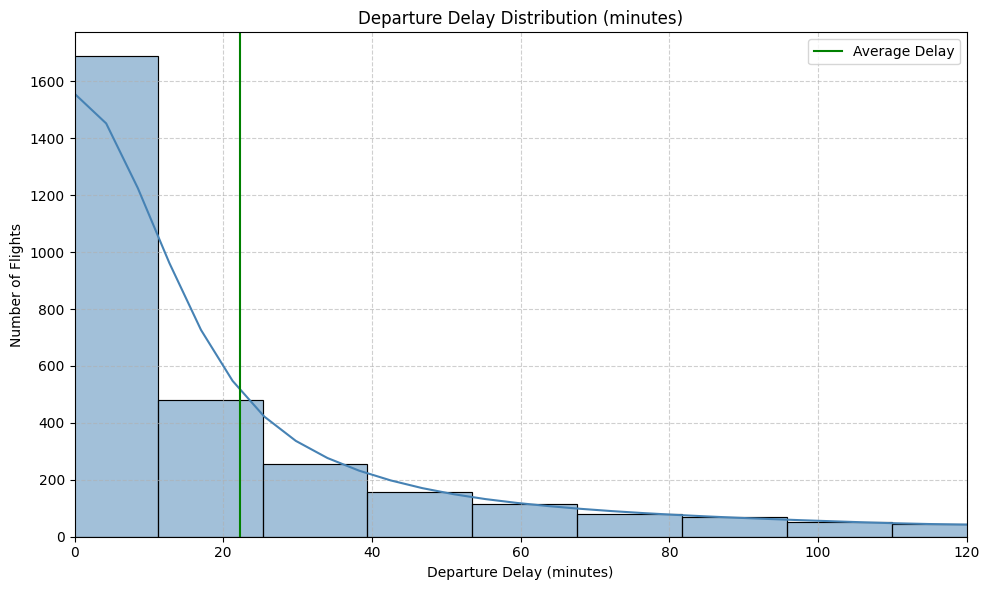

In [207]:
plt.figure(figsize=(10, 6))
sns.histplot(df['departure_delay'], bins=60, kde=True, color='steelblue')

plt.title("Departure Delay Distribution (minutes)")
plt.xlabel("Departure Delay (minutes)")
plt.ylabel("Number of Flights")
plt.grid(True, linestyle='--', alpha=0.6)

plt.axvline(avg_delay, color='green', linestyle='-', label='Average Delay')

plt.xlim(0, 120)
plt.legend()
plt.tight_layout()
plt.show()

**How many flights have scheduled ground time close to or below the minimum turn mins?**

In [208]:
close_min_ground_time = df['scheduled_ground_time_minutes'] <= df['minimum_turn_minutes']
num_at_or_below = close_min_ground_time.sum()
pct_at_or_below = num_at_or_below / len(df) * 100

# within 5 minutes of minimum
delta = df['scheduled_ground_time_minutes'] - df['minimum_turn_minutes']
mask_within_5 = delta <= 5
num_within_5 = mask_within_5.sum()
pct_within_5 = num_within_5 / len(df) * 100

print(f"Flights at or below minimum turn: {num_at_or_below} ({pct_at_or_below:.2f}%)")
print(f"Flights within 5 minutes of minimum turn: {num_within_5} ({pct_within_5:.2f}%)")

Flights at or below minimum turn: 438 (9.73%)
Flights within 5 minutes of minimum turn: 525 (11.66%)


In [209]:
df['ground_time_gap'] = df['scheduled_ground_time_minutes'] - df['actual_ground_time_minutes']

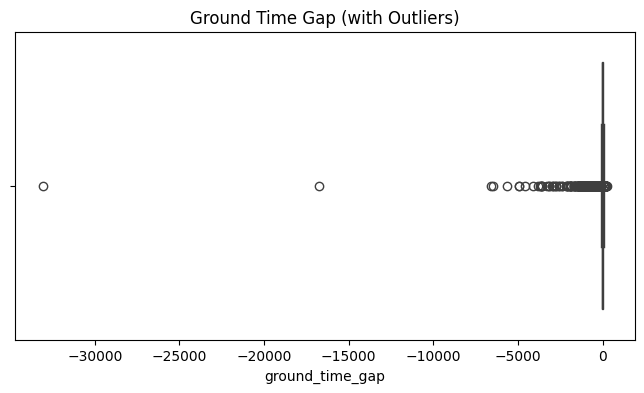

In [210]:
plt.figure(figsize=(8,4))
sns.boxplot(x=df['ground_time_gap'])
plt.title("Ground Time Gap (with Outliers)")
plt.show()


In [211]:
Q1 = df['ground_time_gap'].quantile(0.25)
Q3 = df['ground_time_gap'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_df = df[(df['ground_time_gap'] >= lower_bound) & (df['ground_time_gap'] <= upper_bound)]


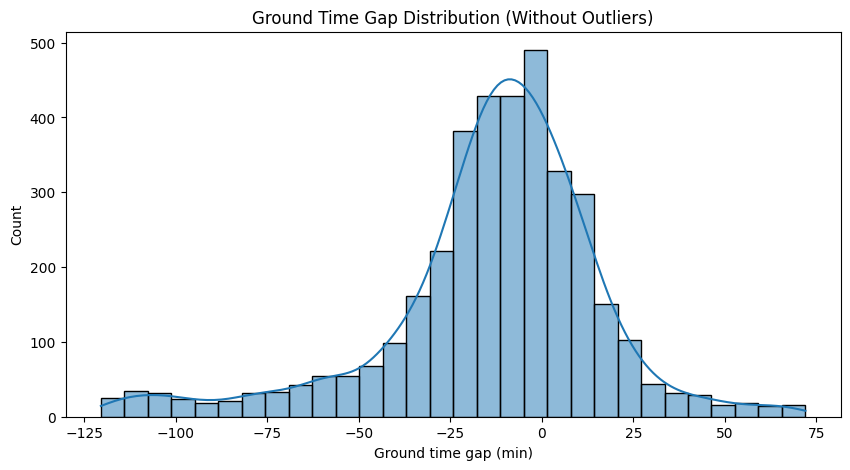

In [212]:
plt.figure(figsize=(10,5))
sns.histplot(filtered_df['ground_time_gap'], bins=30, kde=True)
plt.title("Ground Time Gap Distribution (Without Outliers)")
plt.xlabel("Ground time gap (min)")
plt.ylabel("Count")
plt.show()

**What is the average ratio of transfer bags vs. checked bags across flights?**

In [213]:
avg_transfer_ratio = bag_counts['transfer_ratio'].mean()
print(f"Average transfer bag ratio: {avg_transfer_ratio:.4f}")

Average transfer bag ratio: 0.4503


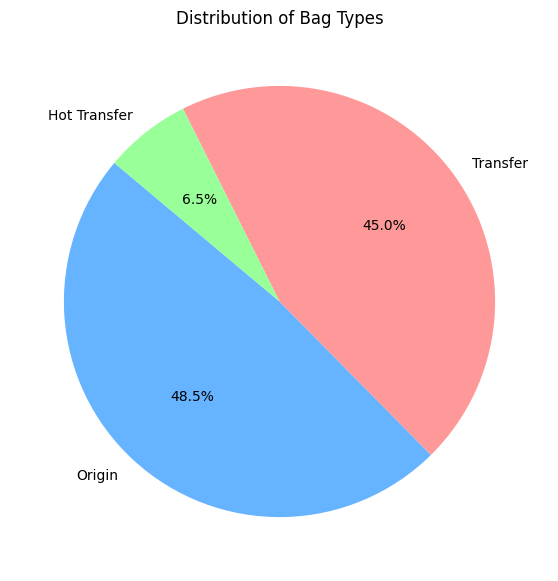

In [214]:
bag_type_counts = bags_ua['bag_type'].value_counts()

# Pie chart
plt.figure(figsize=(7,7))
plt.pie(bag_type_counts, labels=bag_type_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#ff9999','#99ff99'])
plt.title("Distribution of Bag Types")
plt.show()

**How do passenger loads compare across flights, and do higher loads correlate with operational difficulty?**

In [215]:
df['pax_load_ratio']

0       1.023952
1       1.084337
2       0.819277
3       1.015873
4       1.115385
          ...   
4497    1.060241
4498    1.435754
4499    1.061453
4500    1.468254
4501    1.174603
Name: pax_load_ratio, Length: 4502, dtype: float64

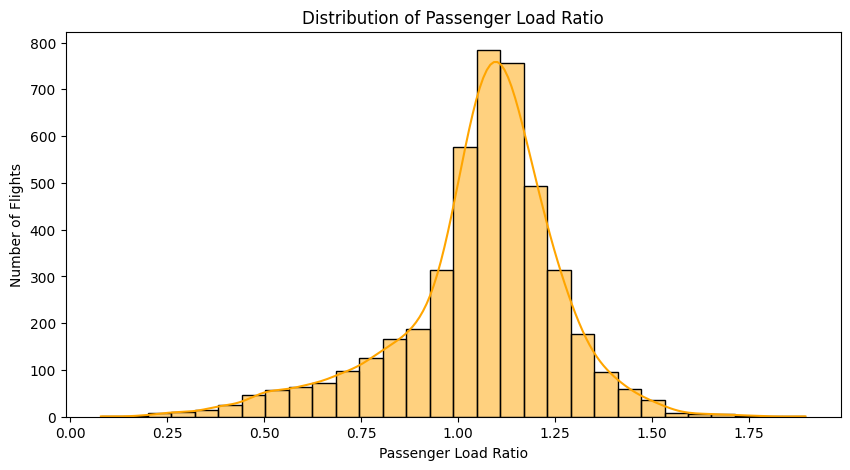

In [216]:
plt.figure(figsize=(10,5))
sns.histplot(df['pax_load_ratio'], bins=30, kde=True, color='orange')
plt.title("Distribution of Passenger Load Ratio")
plt.xlabel("Passenger Load Ratio")
plt.ylabel("Number of Flights")
plt.show()

In [217]:
corr_load_difficulty = df[['pax_load_ratio', 'difficulty_score']].corr().iloc[0,1]
print(f"Correlation between passenger load and difficulty score: {corr_load_difficulty:.3f}")

Correlation between passenger load and difficulty score: -0.028


**Are high special service requests flights also high-delay after controlling for load?**

In [218]:
df['special_req_count_norm']

0       0.272727
1       0.181818
2       0.444976
3       0.392344
4       0.406699
          ...   
4497    0.181818
4498    0.263158
4499    0.478469
4500    0.052632
4501    0.550239
Name: special_req_count_norm, Length: 4502, dtype: float64

In [219]:
from scipy.stats import pearsonr

corr, p_value = pearsonr(df['special_req_count_norm'], df['departure_delay_norm'])
print(f"Pearson correlation: {corr:.3f}, p-value: {p_value:.3f}")

Pearson correlation: 0.102, p-value: 0.000


**flights with more special requests tend to have slightly higher delays, but the effect is very weak.**

# Flight Difficulty Score Development

**Difficulty score**

In [220]:
df.head()

,flight_number,scheduled_departure_date_local,scheduled_arrival_station_code,scheduled_departure_datetime_local,scheduled_arrival_datetime_local,actual_departure_datetime_local,actual_arrival_datetime_local,total_seats,fleet_type,scheduled_ground_time_minutes,...,minimum_turn_minutes_norm,ground_time_pressure_norm,total_pax_norm,lap_child_count_norm,pax_load_ratio_norm,child_ratio_norm,transfer_ratio_norm,special_req_count_norm,difficulty_score,ground_time_gap
0,920,2025-08-03,LHR,2025-08-03 18:05:00+00:00,2025-08-04 08:20:00+00:00,2025-08-03 18:27:00+00:00,2025-08-04 08:06:00+00:00,167,B767-300,235.0,...,0.910714,0.308511,0.309615,0.142857,0.520252,0.249663,0.258741,0.272727,0.167482,6.0
1,1776,2025-08-10,PHL,2025-08-10 18:20:00+00:00,2025-08-10 21:35:00+00:00,2025-08-10 20:11:00+00:00,2025-08-10 23:26:00+00:00,166,B737-800,76.0,...,0.071429,0.335526,0.326923,0.000000,0.553510,0.197650,0.447059,0.181818,0.224434,7.0
2,1398,2025-08-05,ATL,2025-08-05 18:20:00+00:00,2025-08-05 21:29:00+00:00,2025-08-05 18:16:00+00:00,2025-08-05 21:49:00+00:00,166,B737-800,75.0,...,0.071429,0.340000,0.242308,0.000000,0.407522,0.156957,0.728571,0.444976,0.240233,3.0
3,374,2025-08-15,MSP,2025-08-15 16:10:00+00:00,2025-08-15 17:49:00+00:00,2025-08-15 16:38:00+00:00,2025-08-15 18:24:00+00:00,126,A319-100,54.0,...,0.000000,0.398148,0.226923,0.142857,0.515802,0.111178,0.722892,0.392344,0.256373,13.0
4,1577,2025-08-15,SFO,2025-08-15 14:40:00+00:00,2025-08-15 17:26:00+00:00,2025-08-15 14:39:00+00:00,2025-08-15 17:11:00+00:00,234,B757-300,123.0,...,0.205357,0.268293,0.482692,0.142857,0.570610,0.299882,0.442953,0.406699,0.198456,-11.0


In [221]:
df['difficulty_score'].describe()

count    4502.000000
mean        0.201078
std         0.063324
min         0.027220
25%         0.162178
50%         0.199147
75%         0.234307
max         0.636662
Name: difficulty_score, dtype: float64

**Ranking**

In [222]:
df['daily_rank'] = df.groupby('scheduled_departure_date_local')['difficulty_score'].rank(ascending=False)

In [223]:
df.head()

,flight_number,scheduled_departure_date_local,scheduled_arrival_station_code,scheduled_departure_datetime_local,scheduled_arrival_datetime_local,actual_departure_datetime_local,actual_arrival_datetime_local,total_seats,fleet_type,scheduled_ground_time_minutes,...,ground_time_pressure_norm,total_pax_norm,lap_child_count_norm,pax_load_ratio_norm,child_ratio_norm,transfer_ratio_norm,special_req_count_norm,difficulty_score,ground_time_gap,daily_rank
0,920,2025-08-03,LHR,2025-08-03 18:05:00+00:00,2025-08-04 08:20:00+00:00,2025-08-03 18:27:00+00:00,2025-08-04 08:06:00+00:00,167,B767-300,235.0,...,0.308511,0.309615,0.142857,0.520252,0.249663,0.258741,0.272727,0.167482,6.0,198.0
1,1776,2025-08-10,PHL,2025-08-10 18:20:00+00:00,2025-08-10 21:35:00+00:00,2025-08-10 20:11:00+00:00,2025-08-10 23:26:00+00:00,166,B737-800,76.0,...,0.335526,0.326923,0.000000,0.553510,0.197650,0.447059,0.181818,0.224434,7.0,91.0
2,1398,2025-08-05,ATL,2025-08-05 18:20:00+00:00,2025-08-05 21:29:00+00:00,2025-08-05 18:16:00+00:00,2025-08-05 21:49:00+00:00,166,B737-800,75.0,...,0.340000,0.242308,0.000000,0.407522,0.156957,0.728571,0.444976,0.240233,3.0,55.0
3,374,2025-08-15,MSP,2025-08-15 16:10:00+00:00,2025-08-15 17:49:00+00:00,2025-08-15 16:38:00+00:00,2025-08-15 18:24:00+00:00,126,A319-100,54.0,...,0.398148,0.226923,0.142857,0.515802,0.111178,0.722892,0.392344,0.256373,13.0,46.0
4,1577,2025-08-15,SFO,2025-08-15 14:40:00+00:00,2025-08-15 17:26:00+00:00,2025-08-15 14:39:00+00:00,2025-08-15 17:11:00+00:00,234,B757-300,123.0,...,0.268293,0.482692,0.142857,0.570610,0.299882,0.442953,0.406699,0.198456,-11.0,162.0


**Classification**

In [224]:
df['difficulty_class'] = pd.qcut(
    df['daily_rank'], 
    q=3, 
    labels=['Difficult', 'Medium', 'Easy']
)

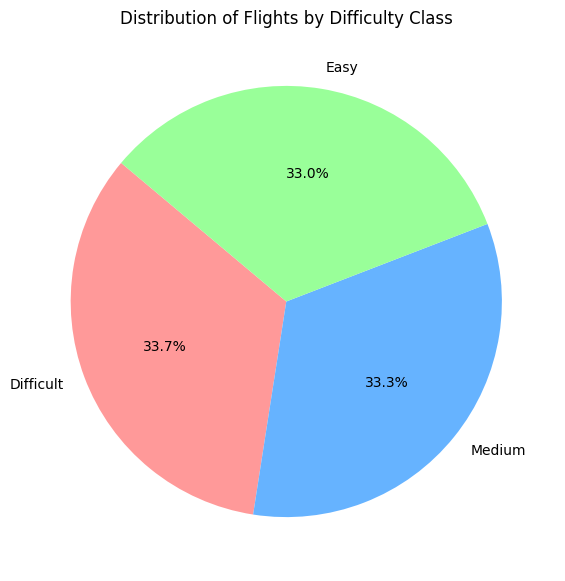

In [225]:
difficulty_counts = df['difficulty_class'].value_counts()
plt.figure(figsize=(7,7))
plt.pie(
    difficulty_counts, 
    labels=difficulty_counts.index, 
    autopct='%1.1f%%', 
    startangle=140, 
    colors=['#ff9999','#66b3ff','#99ff99']
)
plt.title("Distribution of Flights by Difficulty Class")
plt.show()

In [226]:
df[df['scheduled_departure_date_local'] == '2025-08-04'].sort_values('daily_rank').head(10)

,flight_number,scheduled_departure_date_local,scheduled_arrival_station_code,scheduled_departure_datetime_local,scheduled_arrival_datetime_local,actual_departure_datetime_local,actual_arrival_datetime_local,total_seats,fleet_type,scheduled_ground_time_minutes,...,total_pax_norm,lap_child_count_norm,pax_load_ratio_norm,child_ratio_norm,transfer_ratio_norm,special_req_count_norm,difficulty_score,ground_time_gap,daily_rank,difficulty_class
1344,1710,2025-08-04,SMF,2025-08-04 19:59:00+00:00,2025-08-04 22:32:00+00:00,2025-08-04 21:19:00+00:00,2025-08-04 23:29:00+00:00,179,B737-900,2.0,...,0.336538,0.285714,0.525521,0.384615,0.550847,0.550239,0.395064,-56.0,1.0,Difficult
1676,845,2025-08-04,GRU,2025-08-04 21:20:00+00:00,2025-08-05 09:30:00+00:00,2025-08-04 21:48:00+00:00,2025-08-05 10:24:00+00:00,318,B787-10,274.5,...,0.676923,0.285714,0.583267,0.393115,0.655556,1.000000,0.367275,-104.5,2.0,Difficult
634,972,2025-08-04,BRU,2025-08-04 17:55:00+00:00,2025-08-05 09:00:00+00:00,2025-08-04 18:26:00+00:00,2025-08-05 09:17:00+00:00,318,B787-10,155.0,...,0.688462,0.142857,0.593659,0.406041,0.623913,0.851675,0.366583,-15.0,3.0,Difficult
2735,2155,2025-08-04,LAX,2025-08-04 19:40:00+00:00,2025-08-04 22:10:00+00:00,2025-08-05 01:26:00+00:00,2025-08-05 03:32:00+00:00,243,B787-8,274.5,...,0.319231,0.000000,0.355201,0.040428,0.235294,0.334928,0.354671,-3298.5,4.0,Difficult
4166,592,2025-08-04,JAC,2025-08-04 16:50:00+00:00,2025-08-04 19:05:00+00:00,2025-08-04 17:37:00+00:00,2025-08-04 19:42:00+00:00,126,B737-700,4.0,...,0.344231,0.428571,0.782445,0.790598,0.647727,0.234450,0.334684,-53.0,5.0,Difficult
3599,349,2025-08-04,BTV,2025-08-04 18:35:00+00:00,2025-08-04 21:52:00+00:00,2025-08-04 19:29:00+00:00,2025-08-04 22:31:00+00:00,166,B737-800,15.0,...,0.296154,0.285714,0.500424,0.347092,0.794118,0.181818,0.328238,-32.0,6.0,Difficult
3648,1660,2025-08-04,SFO,2025-08-04 16:50:00+00:00,2025-08-04 19:36:00+00:00,2025-08-04 18:07:00+00:00,2025-08-04 20:35:00+00:00,234,B757-300,9.0,...,0.501923,0.142857,0.594147,0.262560,0.333333,0.339713,0.323508,-57.0,7.0,Difficult
1307,2100,2025-08-04,SLC,2025-08-04 13:11:00+00:00,2025-08-04 15:40:00+00:00,2025-08-04 13:54:00+00:00,2025-08-04 16:14:00+00:00,166,B737-800,8.0,...,0.321154,0.000000,0.543556,0.241199,0.421053,0.392344,0.322869,-46.0,8.0,Difficult
156,1377,2025-08-04,MYR,2025-08-04 11:20:00+00:00,2025-08-04 14:35:00+00:00,2025-08-04 11:42:00+00:00,2025-08-04 14:41:00+00:00,126,B737-700,18.0,...,0.319231,0.428571,0.725620,0.687281,0.337500,0.315789,0.299486,-24.0,9.0,Difficult
2076,291,2025-08-04,BDL,2025-08-04 18:15:00+00:00,2025-08-04 21:36:00+00:00,2025-08-04 21:51:00+00:00,2025-08-05 01:06:00+00:00,150,A320-200,274.5,...,0.273077,0.000000,0.514403,0.140435,0.714286,0.272727,0.295742,-1314.5,10.0,Difficult


In [227]:
df.head()

,flight_number,scheduled_departure_date_local,scheduled_arrival_station_code,scheduled_departure_datetime_local,scheduled_arrival_datetime_local,actual_departure_datetime_local,actual_arrival_datetime_local,total_seats,fleet_type,scheduled_ground_time_minutes,...,total_pax_norm,lap_child_count_norm,pax_load_ratio_norm,child_ratio_norm,transfer_ratio_norm,special_req_count_norm,difficulty_score,ground_time_gap,daily_rank,difficulty_class
0,920,2025-08-03,LHR,2025-08-03 18:05:00+00:00,2025-08-04 08:20:00+00:00,2025-08-03 18:27:00+00:00,2025-08-04 08:06:00+00:00,167,B767-300,235.0,...,0.309615,0.142857,0.520252,0.249663,0.258741,0.272727,0.167482,6.0,198.0,Medium
1,1776,2025-08-10,PHL,2025-08-10 18:20:00+00:00,2025-08-10 21:35:00+00:00,2025-08-10 20:11:00+00:00,2025-08-10 23:26:00+00:00,166,B737-800,76.0,...,0.326923,0.000000,0.553510,0.197650,0.447059,0.181818,0.224434,7.0,91.0,Difficult
2,1398,2025-08-05,ATL,2025-08-05 18:20:00+00:00,2025-08-05 21:29:00+00:00,2025-08-05 18:16:00+00:00,2025-08-05 21:49:00+00:00,166,B737-800,75.0,...,0.242308,0.000000,0.407522,0.156957,0.728571,0.444976,0.240233,3.0,55.0,Difficult
3,374,2025-08-15,MSP,2025-08-15 16:10:00+00:00,2025-08-15 17:49:00+00:00,2025-08-15 16:38:00+00:00,2025-08-15 18:24:00+00:00,126,A319-100,54.0,...,0.226923,0.142857,0.515802,0.111178,0.722892,0.392344,0.256373,13.0,46.0,Difficult
4,1577,2025-08-15,SFO,2025-08-15 14:40:00+00:00,2025-08-15 17:26:00+00:00,2025-08-15 14:39:00+00:00,2025-08-15 17:11:00+00:00,234,B757-300,123.0,...,0.482692,0.142857,0.570610,0.299882,0.442953,0.406699,0.198456,-11.0,162.0,Medium


In [228]:
df.groupby(['scheduled_departure_date_local', 'difficulty_class']).size().unstack(fill_value=0)

difficulty_class,Difficult,Medium,Easy
scheduled_departure_date_local,,,
2025-08-01,101,100,112
2025-08-02,101,100,89
2025-08-03,101,100,102
2025-08-04,101,100,111
2025-08-05,101,100,94
2025-08-06,101,100,69
2025-08-07,101,100,101
2025-08-08,101,100,106
2025-08-09,101,100,92


In [229]:
feature_weights = ['departure_delay_norm', 'special_req_count_norm', 'ground_time_pressure_norm', 
                   'transfer_ratio_norm', 'child_ratio_norm', 'pax_load_ratio_norm']

df[feature_weights].mean()

departure_delay_norm         0.046444
special_req_count_norm       0.317121
ground_time_pressure_norm    0.318181
transfer_ratio_norm          0.447047
child_ratio_norm             0.321754
pax_load_ratio_norm          0.537714
dtype: float64

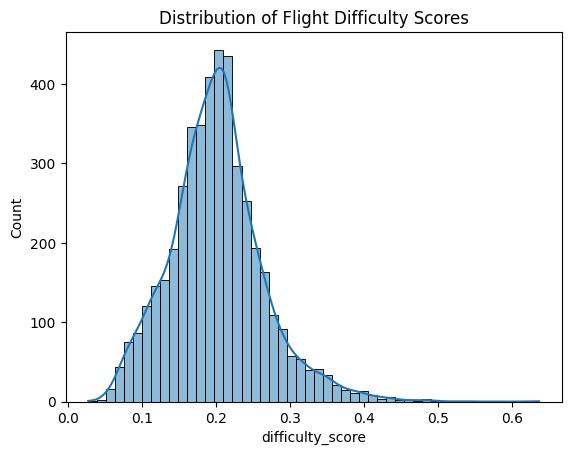

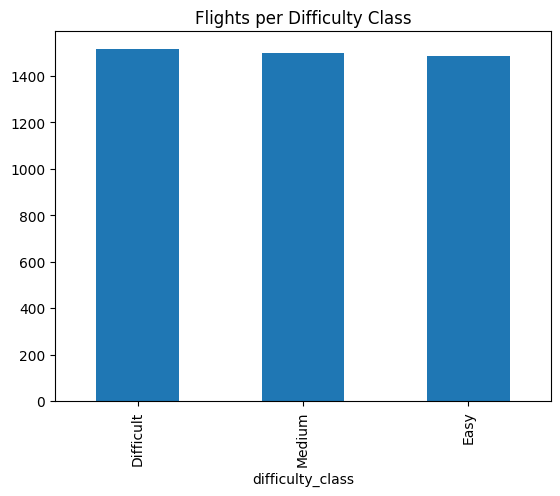

In [230]:
sns.histplot(df['difficulty_score'], bins=50,kde=True)
plt.title('Distribution of Flight Difficulty Scores')
plt.show()

df.groupby('difficulty_class').size().plot(kind='bar')
plt.title('Flights per Difficulty Class')
plt.show()

In [231]:
df['difficulty_class'].value_counts()

difficulty_class
Difficult    1515
Medium       1500
Easy         1487
Name: count, dtype: int64

# Post-Analysis & Operational Insights

**Summarize which destinations consistently show more difficulty.**

In [232]:
dest_summary = df.groupby('scheduled_arrival_station_code')['difficulty_score'].mean().sort_values(ascending=False)
print(dest_summary.head(10))

scheduled_arrival_station_code
GRU    0.384350
BRU    0.349805
FSD    0.318029
FRA    0.306642
ATH    0.288509
MDT    0.265144
ORF    0.264643
FAT    0.263802
FAI    0.257510
ROC    0.256422
Name: difficulty_score, dtype: float64


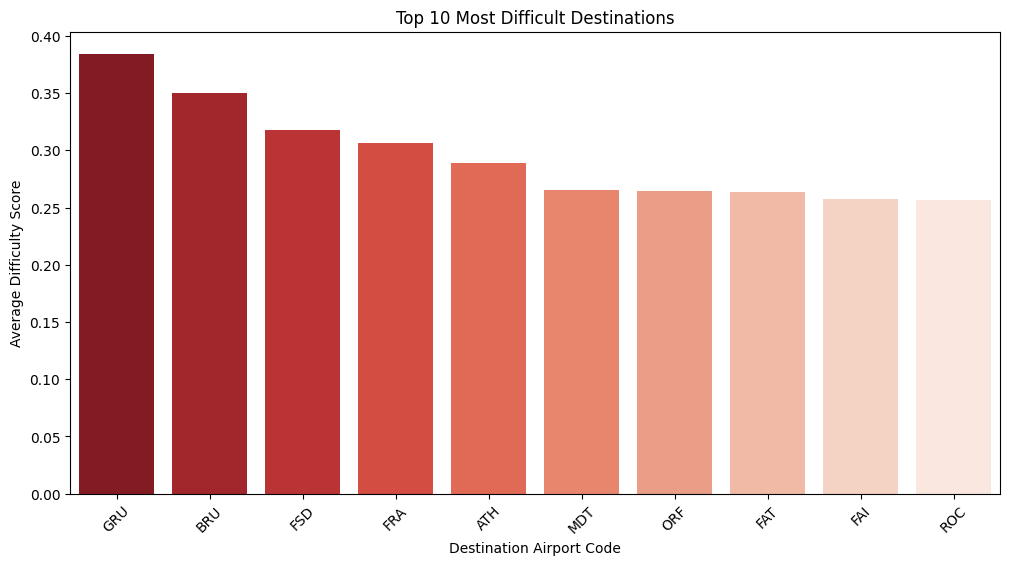

In [233]:
plt.figure(figsize=(12,6))
sns.barplot(x=dest_summary.head(10).index, y=dest_summary.head(10).values, palette='Reds_r')
plt.title("Top 10 Most Difficult Destinations")
plt.xlabel("Destination Airport Code")
plt.ylabel("Average Difficulty Score")
plt.xticks(rotation=45)
plt.show()

**What are the common drivers for those flights?**

*Based on the weights/correlation found earlier*

'departure_delay' : 0.06893310321418053  
 'special_req_count' : 0.24900976384084342  
 'ground_time_pressure' : 0.2509659014331282  
 'transfer_ratio' : 0.3258497811122592  
 'child_ratio' : 0.051059246946303864  
 'pax_load_ratio' : 0.05418220345328482


**What specific actions would you recommend based on the findings for better operational efficiency?**

**Reduce Departure Delays (Most Critical Driver, ~50% Weight)** :Identify why flights depart late — e.g., late arrival of inbound aircraft, crew delays, or ground handling issues.Ensure turnaround times are realistic based on historical ground times for specific destinations.  
**Manage Special Service Requests (SSR) More Efficiently (~21% Weight)** :Flag flights with high SSR counts during planning to allocate additional ground and cabin resources.Train staff to handle high SSR efficiently (wheelchair, special meals, strollers, medical requests).  
**Reduce Ground Time Pressure (~14% Weight)** :   Schedule ground times slightly longer than minimum turn times at high-pressure airports.Optimize aircraft cleaning, refueling, and boarding simultaneously where safe.  
**Improve Transfer Bag Handling (~11% Weight)**  : Baggage flow optimization: Streamline transfer baggage logistics at hubs, especially for flights with high transfer ratios (~45%).Automation: Use conveyor tracking and alerts for bags to reduce mishandling.Dedicated staff: Assign extra baggage staff for flights connecting high-transfer destinations.  
**Minor Drivers (Child Ratio, Passenger Load < 3% Combined)** : Special attention to families: Ensure families with children have smooth boarding; minor delays can be avoided with priority boarding or pre-assigned seats.Passenger load management: Since load has very low correlation with difficulty, it’s not a major driver; focus can remain on SSR and delays.

In [234]:
df.to_csv("flight_analysis.csv", index=False)